In [132]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf

We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [133]:
air = pd.read_csv(r'./airlines_passengers.csv')

Let’s display the first five rows of data

In [134]:
air.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We can see that the data contains a column labeled “Month” that contains dates. In that column, 
the dates are formatted as year–month. We also see that the data starts in the year 1949.
The second column is labeled Passengers, and it contains the number of passengers for the year–month. Let’s take a look at the last five records the data 

In [135]:
air.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [136]:
air.Month = pd.to_datetime(air.Month)

The next thing we can do is convert the month column to an index. 


In [137]:
air.index = air.Month

In [138]:
del air['Month']
air.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

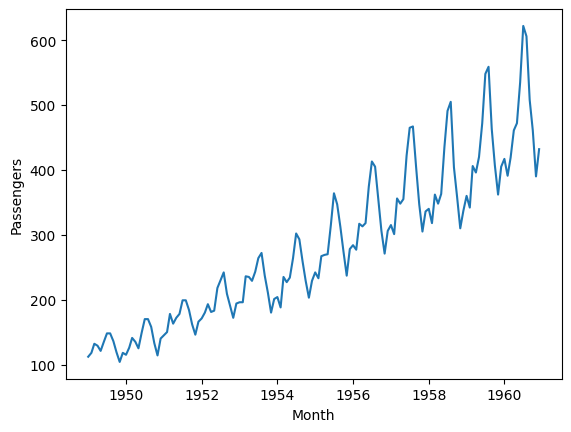

In [140]:
sns.lineplot(data=air, y='Passengers', x='Month');

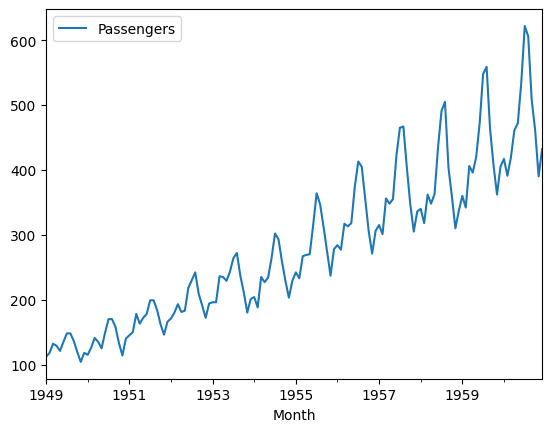

In [141]:
air.plot.line(y='Passengers');

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [142]:
from statsmodels.tsa.stattools import adfuller, kpss

Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [143]:
# ADF Test

result1 = adfuller(air.Passengers, autolag='AIC')
print(f'ADF Statistic: {result1[0]}')
print(f'p-value: {result1[1]}')

result2 = kpss(air.Passengers)
print(f'ADF Statistic: {result2[0]}')
print(f'p-value: {result2[1]}')

ADF Statistic: 0.8153688792060442
p-value: 0.9918802434376409
ADF Statistic: 1.6513122354165206
p-value: 0.01


/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Store our results in a dataframe display it

In [144]:
dfresult1 = pd.DataFrame(result1)
dfresult1

,0
0,0.815369
1,0.99188
2,13
3,130
4,"{'1%': -3.4816817173418295, '5%': -2.884041834..."
5,996.692931


In [145]:
dfresult2 = pd.DataFrame(result2)
dfresult2

,0
0,1.651312
1,0.01
2,8
3,"{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%..."


Explain the results

Both tests here tell us that the data is not stationary. What adfuller says is that since pvalue is greater than 0.05, then we fail to reject the null hypothesis, therefore the data is not stationary.

Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

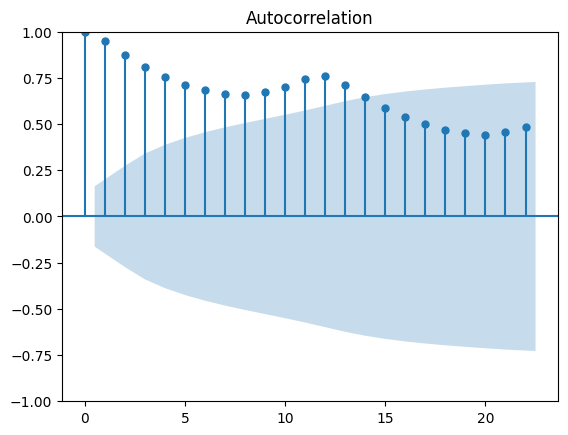

In [146]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculate the ACF (via statsmodel)
plot_acf(air)

# Show the data as a plot (via matplotlib)
plt.show();

Calculate partial autocorrelation

/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


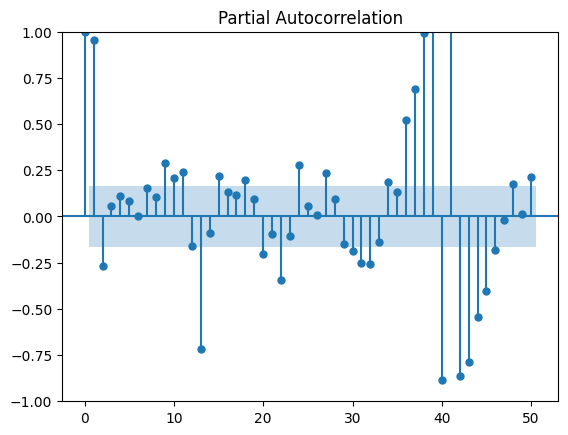

In [147]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

plot_pacf(air, alpha =0.05, lags=50)

plt.show();

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose

Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


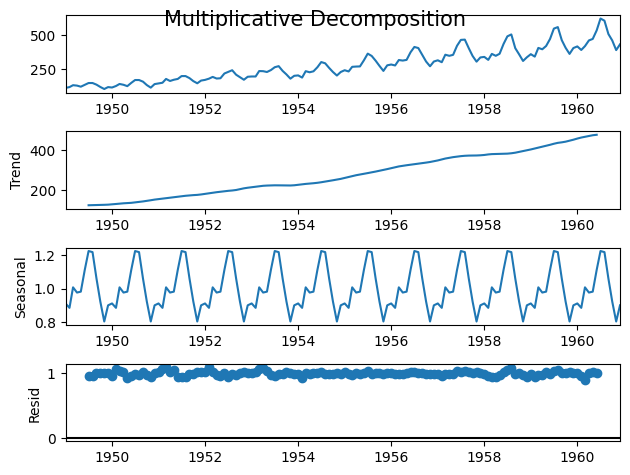

In [149]:
# Multiplicative Decomposition
decomp_m = seasonal_decompose(air, model='multiplicative')

decomp_m.plot().suptitle('Multiplicative Decomposition', fontsize=15)
plt.show()

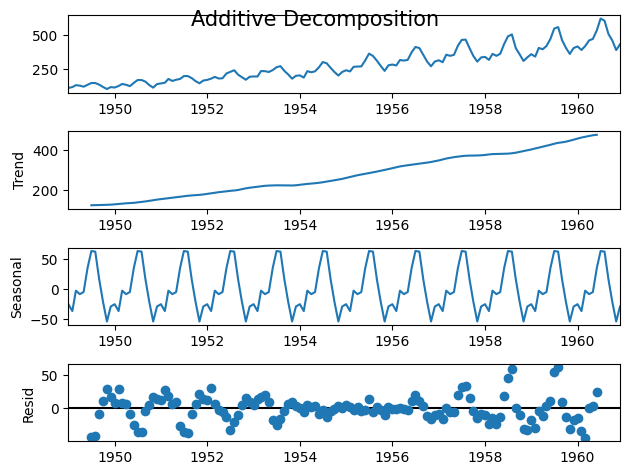

In [150]:
# Additive Decomposition
decomp_a = seasonal_decompose(air, model='additive')

decomp_a.plot().suptitle('Additive Decomposition', fontsize=15)
plt.show()


Can you describe the charts?


We notice that the additive decompose is not the right model, since the residual errors are not stable. Thus, we choose the multiplicative model.
That model shows us that there is an obvious increasing trend, as well as yearly seasonality in our data.

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

In [151]:
air['Stationary'] = np.sqrt(air['Passengers']).diff()
air = air.fillna(0)

In [152]:
result1 = adfuller(air.Stationary, autolag='AIC')
print(f'ADF Statistic: {result1[0]}')
print(f'p-value: {result1[1]}')

ADF Statistic: -3.2950823958668893
p-value: 0.015099727661250166


In [153]:
air.head()

,Passengers,Stationary
Month,,
1949-01-01,112,0.000000
1949-02-01,118,0.279775
1949-03-01,132,0.626345
1949-04-01,129,-0.131309
1949-05-01,121,-0.357817


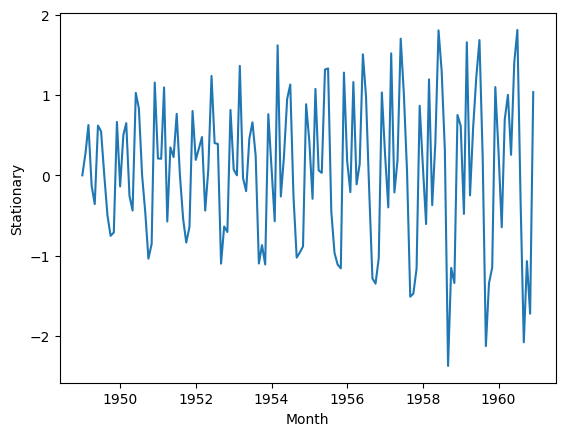

In [154]:
sns.lineplot(air.Stationary);

In [155]:
from statsmodels.tsa.arima.model import ARIMA

MA(1)

In [156]:
ma1 = ARIMA(air.Stationary, order=(0,0,1))
rm_ma1 = ma1.fit()

/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Display the output

In [157]:
print(rm_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:             Stationary   No. Observations:                  144
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -183.073
Date:                Wed, 16 Nov 2022   AIC                            372.147
Time:                        15:47:20   BIC                            381.056
Sample:                    01-01-1949   HQIC                           375.767
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0742      0.098      0.757      0.449      -0.118       0.266
ma.L1          0.3405      0.093      3.681      0.000       0.159       0.522
sigma2         0.7437      0.102      7.286      0.0

MA(2)

In [158]:
ma2 = ARIMA(air.Stationary, order=(0,0,2))
rm_ma2 = ma2.fit()

/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Display the output

In [159]:
print(rm_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:             Stationary   No. Observations:                  144
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -181.384
Date:                Wed, 16 Nov 2022   AIC                            370.768
Time:                        15:47:20   BIC                            382.647
Sample:                    01-01-1949   HQIC                           375.595
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0749      0.073      1.031      0.302      -0.067       0.217
ma.L1          0.2999      0.082      3.667      0.000       0.140       0.460
ma.L2         -0.3025      0.068     -4.463      0.0

AR(2)

In [160]:
ar2 = ARIMA(air.Stationary, order=(1,0,0))
rm_ar2 = ar2.fit()
print(rm_ar2.summary())

/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Stationary   No. Observations:                  144
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -184.708
Date:                Wed, 16 Nov 2022   AIC                            375.416
Time:                        15:47:20   BIC                            384.325
Sample:                    01-01-1949   HQIC                           379.036
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0730      0.102      0.713      0.476      -0.128       0.274
ar.L1          0.2563      0.089      2.886      0.004       0.082       0.430
sigma2         0.7611      0.101      7.507      0.0

ARMA (?,?)

In [180]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in (order_list):
        try: 
            model = ARIMA(exog, order=order).fit()
            aic = model.aic
            results.append([order, model.aic])
        except:
            continue
            
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [181]:
ord_list = [(0,0,1), (0,0,2), (0,0,3), (1,0,0), (1,0,1), (1,0,2), (1,0,3), (2,0,0), (2,0,1), (2,0,2), (2,0,3), (3,0,0), (3,0,1), (3,0,2), (3,0,3)]

In [182]:
res_df = optimize_ARIMA(air.Stationary, ord_list)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

ARIMA(?,?)

In [184]:
import pmdarima as pm

In [190]:
stepwise_fit = pm.auto_arima(air.Stationary, start_p=0, start_q=0,
                             max_p=4, max_q=4, m=12,
                             seasonal=True,
                             d=0, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True, scoring='mse')  # set to stepwise


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=91.648, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=103.633, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=76.690, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=77.263, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=101.642, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=89.453, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=78.624, Time=0.50 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=78.613, Time=0.23 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=77.639, Time=0.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=80.609, Time=1.40 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=91.706, Time=0.09 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=78.453, Time=0.21 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=78.027, Time=0.24 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=76.034, Time=0.15 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=89

Display the output

In [191]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                 -34.067
Date:                             Wed, 16 Nov 2022   AIC                             74.135
Time:                                     16:08:27   BIC                             82.783
Sample:                                 01-01-1949   HQIC                            77.649
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3777      0.068     -5.534      0.000      -0.512      -0.244
ar.S.L12      -0.3575      0.078     -4.601      0.000      -0.510      -0.205
sigma2         0.0968      0.011      8.470      0.000       0.074       0.119
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.96   Prob(JB):                         0.52
Heteroskedasticity (H):               1.33   Skew:                             0.19
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [196]:
opt = ARIMA(air.Stationary, order=(0,0,1), seasonal_order=(1,1,0,12))
rm_opt = opt.fit()
print(rm_opt.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        Stationary   No. Observations:                  144
Model:             ARIMA(0, 0, 1)x(1, 1, [], 12)   Log Likelihood                 -34.067
Date:                           Wed, 16 Nov 2022   AIC                             74.135
Time:                                   16:15:49   BIC                             82.783
Sample:                               01-01-1949   HQIC                            77.649
                                    - 12-01-1960                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3777      0.068     -5.534      0.000      -0.512      -0.244
ar.S.L12      -0.3575      0.078     -4.601

/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/tinym/opt/anaconda3/envs/py3912/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [197]:
from statsmodels.tools.eval_measures import rmse
print(rmse(rm_ma1.predict(), air.Stationary))
print(rmse(rm_ma2.predict(), air.Stationary))
print(rmse(rm_ar2.predict(), air.Stationary))
print(rmse(rm_opt.predict(), air.Stationary))

0.8624164601648239
0.8516342314353805
0.8724241546664118
0.33264893542077384


It seems that by far the lowest rmse is with the optimal arima model (which makes sense, because it is optimal).

Calculate AIC

In [200]:
print(rm_ma1.aic)
print(rm_ma2.aic)
print(rm_ar2.aic)
print(rm_opt.aic)

372.14656480057954
370.76814931242967
375.4156479016776
74.13481404780597


Least AIC for optimal model too!